<a href="https://colab.research.google.com/github/ShatakshiSaha19/CODSOFT/blob/main/MovieGenreClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


In [3]:
train_path = "/content/train_data.txt"
train_data = pd.read_csv(train_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')
train_data

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
36942,Moj mrtvi grad (2000),documentary,Deep in the forest mountains of northwest Bos...
36943,Dead in the Water (2016/II),short,A runaway yacht blazes dangerously through ch...
36944,The Dirty Dish (2005),documentary,SOUL FOOD meets OPRAH! The DIRTY DISH is a re...
36945,The Language of Spirituality (2005),documentary,Do the languages and cosmologies of Native Am...


In [4]:
test_path = "/content/test_data.txt"
test_data = pd.read_csv(test_path, sep=':::', names=['Id', 'Title', 'Description'], engine='python')
test_data

,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."


In [5]:
train_data.describe()

,Title,Genre,Description
count,36946,36946,36946
unique,36946,27,36875
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,9295,10


In [6]:
test_data.describe()

,Id
count,54200.000000
mean,27100.500000
std,15646.336632
min,1.000000
25%,13550.750000
50%,27100.500000
75%,40650.250000
max,54200.000000


In [7]:
train_data.isnull().sum()

,0
Title,0
Genre,0
Description,0


In [8]:
test_data.isnull().sum()

,0
Id,0
Title,0
Description,0


In [9]:
class_distribution = train_data['Genre'].value_counts()
print("Class Distribution:")
print(class_distribution)

Class Distribution:
Genre
drama           9295
documentary     8882
comedy          5066
short           3522
horror          1468
thriller        1110
action           901
western          692
reality-tv       601
family           532
adventure        518
music            512
romance          445
sci-fi           439
adult            410
crime            345
animation        332
sport            293
talk-show        271
mystery          226
fantasy          215
musical          180
biography        168
history          167
game-show        137
news             127
war               92
Name: count, dtype: int64


In [10]:
imbalance_ratio = class_distribution.min() / class_distribution.max()
print("Imbalance Ratio:", imbalance_ratio)

Imbalance Ratio: 0.009897794513179129


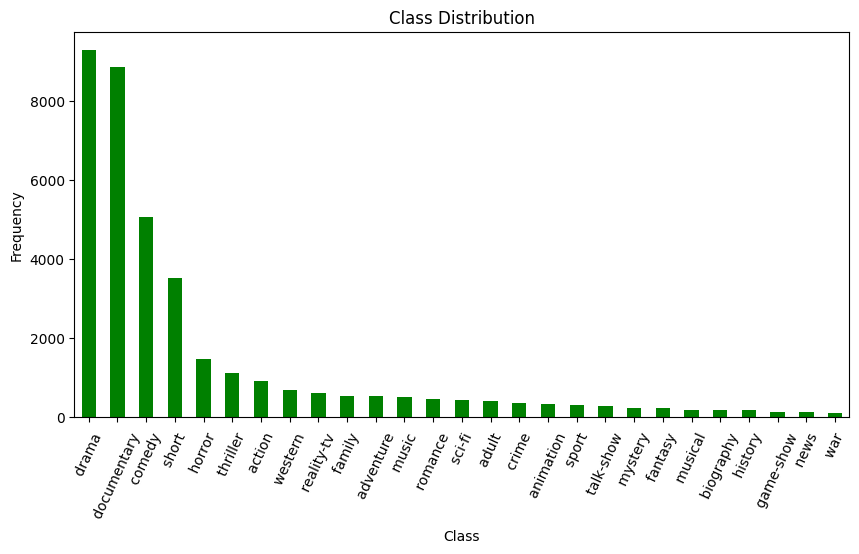

In [11]:
plt.figure(figsize=(10, 5))
class_distribution.plot(kind='bar', color='green')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=65)
plt.show()

In [17]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['Description'])
y_train = train_data['Genre']


nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)


y_train_pred = nb_classifier.predict(X_train_tfidf)


print("Accuracy on training set:", accuracy_score(y_train, y_train_pred))
print("Classification Report on training set:\n", classification_report(y_train, y_train_pred,zero_division=0))

Accuracy on training set: 0.5275266605315866
Classification Report on training set:
                precision    recall  f1-score   support

      action        0.73      0.05      0.09       901
       adult        1.00      0.01      0.02       410
   adventure        0.83      0.05      0.09       518
   animation        0.00      0.00      0.00       332
   biography        0.00      0.00      0.00       168
      comedy        0.57      0.45      0.50      5066
       crime        0.00      0.00      0.00       345
 documentary        0.57      0.90      0.70      8882
       drama        0.45      0.85      0.59      9295
      family        0.00      0.00      0.00       532
     fantasy        0.00      0.00      0.00       215
   game-show        1.00      0.04      0.08       137
     history        0.00      0.00      0.00       167
      horror        0.82      0.29      0.43      1468
       music        0.92      0.10      0.17       512
     musical        0.00      0.00

In [13]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_test = tfidf_vectorizer.fit_transform(test_data['Description'])

In [14]:
X_test_predictions = nb_classifier.predict(X_test)
test_data['Predicted_Genre'] = X_test_predictions

In [15]:
test_data.to_csv('predicted_genres.csv', index=False)

print(test_data)

          Id                             Title  \
0          1             Edgar's Lunch (1998)    
1          2         La guerra de papá (1977)    
2          3      Off the Beaten Track (2010)    
3          4           Meu Amigo Hindu (2015)    
4          5                Er nu zhai (1955)    
...      ...                               ...   
54195  54196   "Tales of Light & Dark" (2013)    
54196  54197      Der letzte Mohikaner (1965)    
54197  54198              Oliver Twink (2007)    
54198  54199                Slipstream (1973)    
54199  54200        Curitiba Zero Grau (2010)    

                                             Description Predicted_Genre  
0       L.R. Brane loves his life - his car, his apar...          drama   
1       Spain, March 1964: Quico is a very naughty ch...    documentary   
2       One year in the life of Albin and his family ...    documentary   
3       His father has died, he hasn't spoken with hi...    documentary   
4       Before he was kn